In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Loading the breast cancer dataset from CSV file
df = pd.read_csv('/content/breastcancer - breastcancer - breastcancer - breastcancer.csv')

# Basic info about the dataset
print('Length of the dataset : ', len(df))
print('Shape of the dataset : ', df.shape)
print(df.head(3))  # Display first 3 rows

Length of the dataset :  569
Shape of the dataset :  (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38           122.8     1001.0   
1    842517         M        20.57         17.77           132.9     1326.0   
2  84300903         M        19.69         21.25           130.0     1203.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33            184.6      2019.0   
1  ...         24.99          23.41            158.8      1956.0   
2  ...         23.57          25.53            152.5      1709.0   

   smoothness_worst  compactness_worst

In [3]:
# Splitting dataset into features (X) and target (y)
x = df.iloc[:, 2:]  # All columns from 3rd onwards are features
y = df.iloc[:, 1]   # The 2nd column is assumed to be the target class

# Splitting data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# Feature scaling to normalize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)        # Only transform test data

# Checking shapes of transformed data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [5]:
# ---------------- GINI CRITERIA ---------------- #
print("DECISION TREE WITH GINI CRITERIA")
from sklearn.tree import DecisionTreeClassifier
# Creating Decision Tree classifier using 'gini' impurity
dc = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Training the model
dc.fit(x_train, y_train)


DECISION TREE WITH GINI CRITERIA


DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
# Predicting test set results
y_pred = dc.predict(x_test)
print(y_pred.shape)
print(y_pred)

# Model evaluation using accuracy, confusion matrix and classification report
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cfm)
print("Classification Report : \n", classification_report(y_test, y_pred))

(114,)
['B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B']
Accuracy Score :  0.9736842105263158
Confusion Matrix : 
 [[73  2]
 [ 1 38]]
Classification Report : 
               precision    recall  f1-score   support

           B       0.99      0.97      0.98        75
           M       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



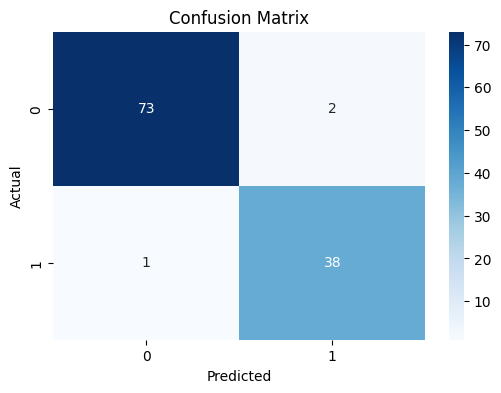

In [7]:
# Visualizing the confusion matrix using heatmap
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure plt is imported only once at the top

plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues')  # Heatmap for better visual understanding
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree : 


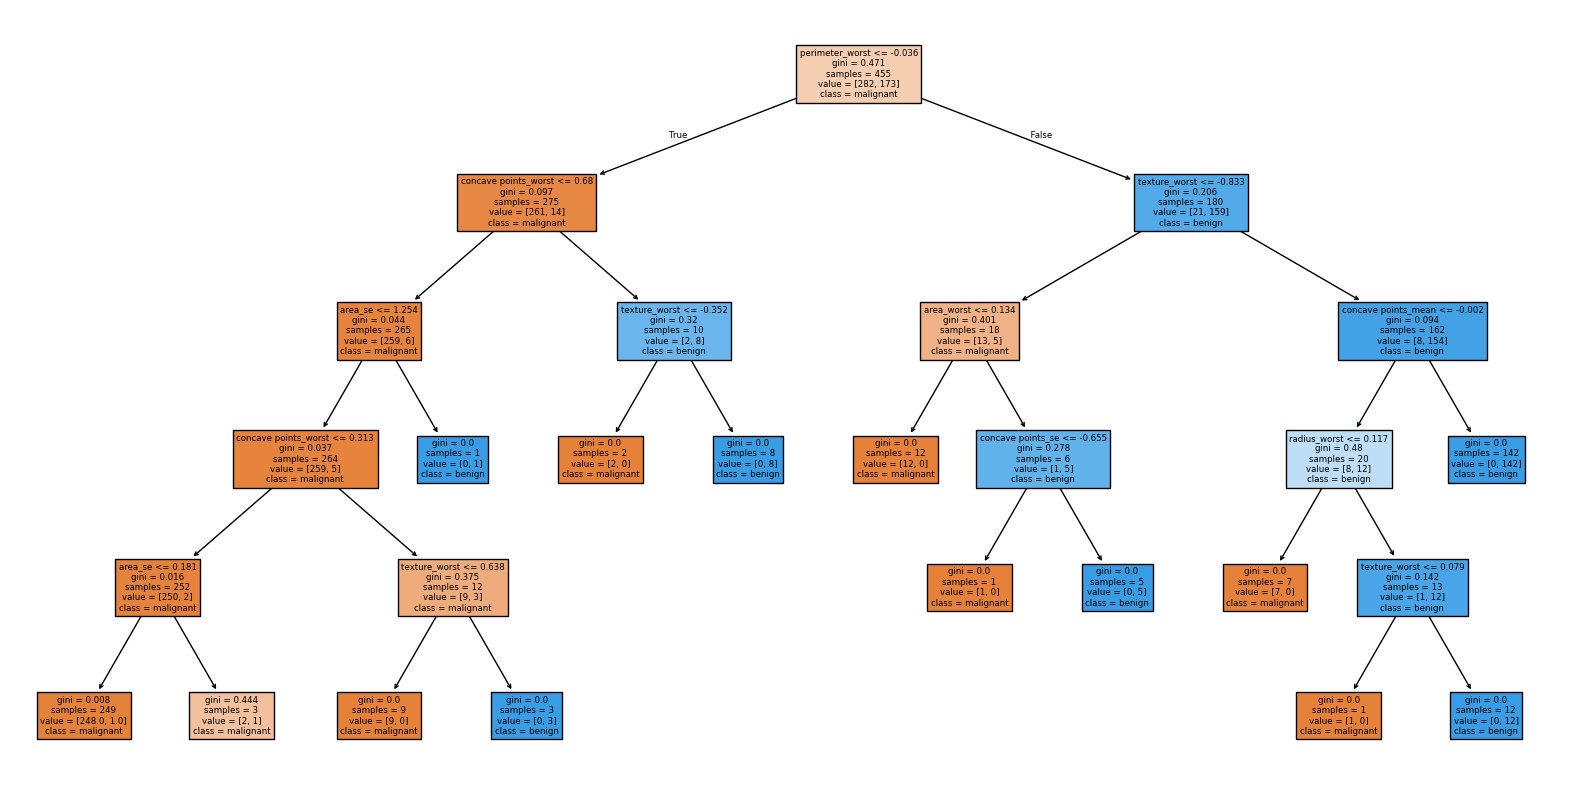

In [9]:
# Visualizing the trained decision tree (Gini)
from sklearn.tree import plot_tree
print("Decision Tree : ")
plt.figure(figsize=(20,10))
plot_tree(dc, filled=True, feature_names=x.columns, class_names=['malignant', 'benign'])
plt.show()

In [10]:
# ---------------- ENTROPY CRITERIA ---------------- #
print("DECISION TREE WITH ENTROPY CRITERIA")

# Creating Decision Tree classifier using 'entropy' impurity
dc = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

# Training the model again with entropy criterion
dc.fit(x_train, y_train)


DECISION TREE WITH ENTROPY CRITERIA


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [12]:
# Predicting test set results
y_pred = dc.predict(x_test)
print(y_pred.shape)
print(y_pred)



(114,)
['B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'B' 'B' 'M' 'B']


In [13]:

# Model evaluation again
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
cfm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cfm)
print("Classification Report : \n", classification_report(y_test, y_pred))

Accuracy Score :  0.9210526315789473
Confusion Matrix : 
 [[69  6]
 [ 3 36]]
Classification Report : 
               precision    recall  f1-score   support

           B       0.96      0.92      0.94        75
           M       0.86      0.92      0.89        39

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



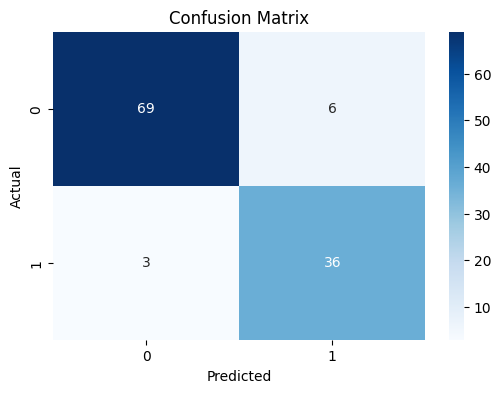

In [14]:
# Visualizing the new confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cfm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Decision Tree : 


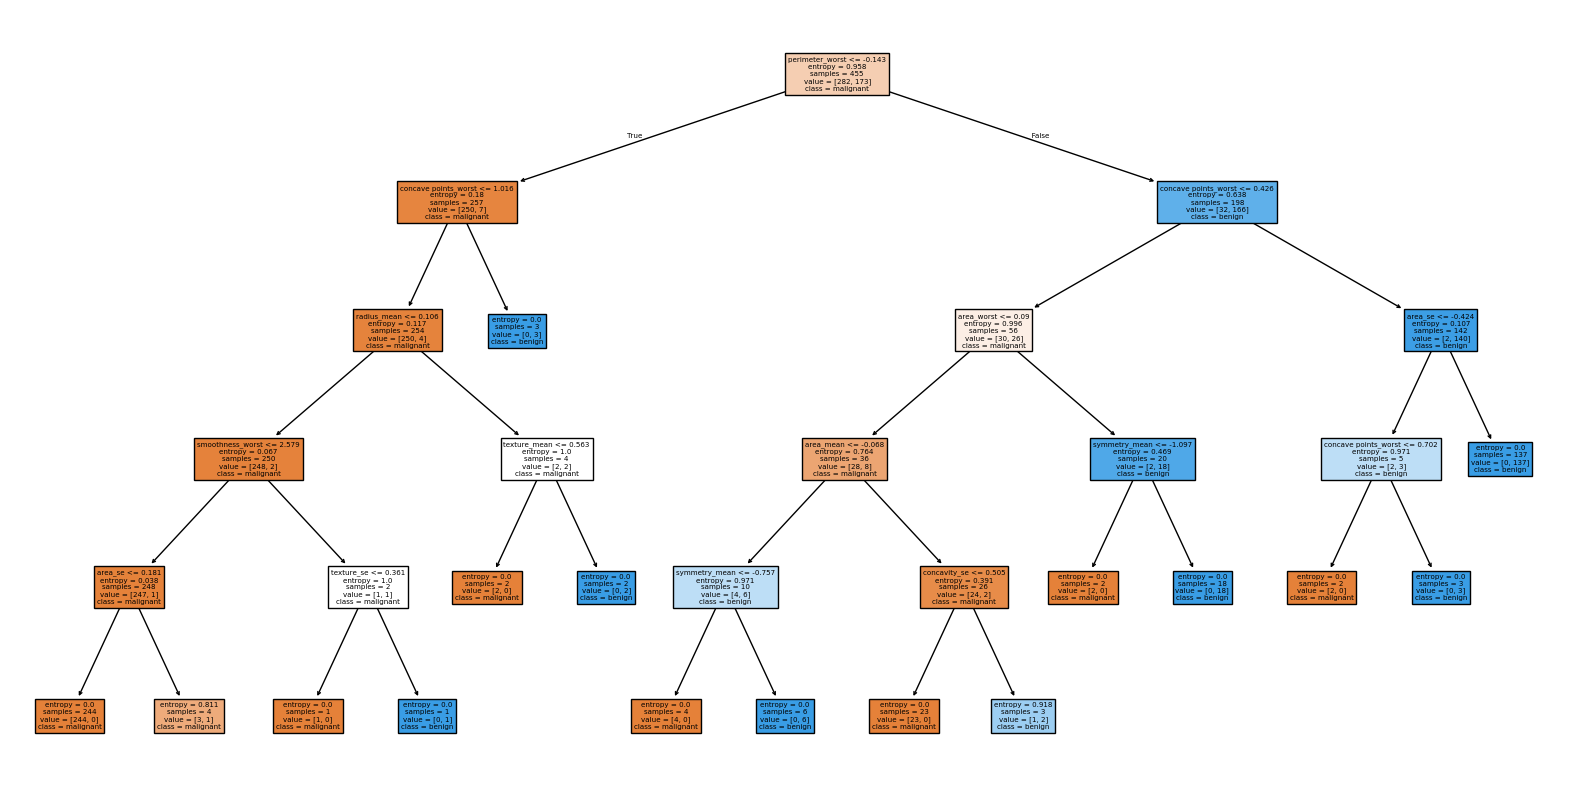

In [15]:

# Visualizing the trained decision tree (Entropy)
print("Decision Tree : ")
plt.figure(figsize=(20,10))
plot_tree(dc, filled=True, feature_names=x.columns, class_names=['malignant', 'benign'])
plt.show()